# Problem Solving Homework 3
This homework is intended for you to develop your skills in both Pandas and Seaborn, as well as understanding visualization and summarization, and starting to model data. As well, this homework aims to help you develop your independent thinking skills as you'll have to think about which features to use and what visualization might work best. This is a bit like what you have to do in research.

You will be working with 3 different data sets in each of the 3 questions.


### Instructions

The instructions are the same as in Problem Solving homework 2 
#### Coding instructions
- you can only use **one operator** per line of code. Reminder: an operator is any boolean, mathematical, indexing operation, or applying a function, including but not limited to `+,-,[],.loc, &,...`. Please feel free to write me if you are not sure.
- you must include logical names for all your variables. No variables called `i` or `df`. Each variable name must represent the goal of that variable like `check_positive` or `states_in_bin`. 

#### Problem solving steps
Instead of writing the algorithm, here you are going to be writing the problem solving steps you took to figure out your answer. Here is how you do it: 
- Start with the most basic idea you come up with.
- In a Markdown cell, write the idea and explain your thinking, and explain where you learned how to do the code in terms of which code notebook from class, and which part of the code notebook.
- Then, write your code to implement that idea in a code cell and run that code.
- After you run it, make a new markdown cell and explain 1) what next step is needed, either to fix code that wasn't working right, or did not yet solve the problem and 2) how you changed your code to do the next step.
- THen, copy your code from teh last step into a new code cell, make your changes, and run this next code cell again
- Continue until the problem is solved. You can only do one step at a time, so don't try to combine multiple steps at once.

Because you are explaining your logic in this way, I don't additionally require you to add code comments but you can if you want.


## Question 1: NHANES health data
This data contains the result of interviews and other data collection on thousands of US adults in the 70s and 80s.

### A. Cleaning
Read in the NHANES NHEFS data into a data frame and clean it to make it more useful for analysis with the following steps. **Do not use a for loop**. Add new columns to the data frame:
- School is year of school. Make a column called "completion" with levels "no HS", "high school", "college". Then make a number-coded column "HS_grad" that indicates whether or not they completed high school (with 1 or 0).
- Similarly, code exercise and alcohol into numbers so we can quickly summarize their distributsions.

1. Load Pandas and upload the NHEFS file

Where code was taught:
- read_csv [Lecture 10.2.25]

In [31]:
import pandas as pd

In [32]:
NHEFS = pd.read_csv('nhefs.csv')

2. Create new column for completion

Where code was taught: 
- df.loc[] [Lecture 11.2.25]

In [79]:
NHEFS.loc[:,'completion'] = ''

3. Assinging the completion level values to the completion column using boolean indexing within the loc operator

Where code was taught:
- Boolean indexing with .loc [Lecture 10.21.25]

In [80]:
NHEFS.loc[NHEFS['school'] < 12, 'completion'] = 'no HS'
NHEFS.loc[(NHEFS['school'] >= 12) & (NHEFS['school'] < 16), 'completion'] = 'high school'
NHEFS.loc[NHEFS['school'] >= 16, 'completion'] = 'college'

5. Redefining the values in the exercise and alcoholfreq columns to be purely numerical using a a boolean condition within the loc operator

In [81]:
NHEFS.loc[NHEFS['exercise'] == '0:frequent', 'exercise'] = 0
NHEFS.loc[NHEFS['exercise'] == '1:moderate', 'exercise'] = 1
NHEFS.loc[NHEFS['exercise'] == '2:little', 'exercise'] = 2

In [82]:
NHEFS.loc[NHEFS['alcoholfreq'] == '0:daily', 'alcoholfreq'] = 0
NHEFS.loc[NHEFS['alcoholfreq'] == '1:2-3/week', 'alcoholfreq'] = 1
NHEFS.loc[NHEFS['alcoholfreq'] == '2:1-4/month', 'alcoholfreq'] = 2
NHEFS.loc[NHEFS['alcoholfreq'] == '3:<1/month', 'alcoholfreq'] = 3
NHEFS.loc[NHEFS['alcoholfreq'] == '4:none/year', 'alcoholfreq'] = 4

### B. Summarize
1. Make a data frame to summarize what differences there are between people who quit or don't quit smoking. Do not use a for loop. 
2. Make a similar data frame for high school graduate or not. Then, look at the results and pick one of the characteristics that seems to be different betweeen high school grads versus non-grads. Explain why you picked that one.

1. Catagorizing values into two groups, quit or haven quit, then finding the mean value for the income column

Where code was taught: 
- Groupby [Lecture 11.4.25]
- .mean() [Lecture 10.7,25]

In [83]:
SummarizeSmokers = NHEFS.groupby('quit')[['income']].mean()
SummarizeSmokers

,income
quit,
0-No,17.975826
1-Yes,18.152620


2. Created a new column, HS Grad, where Highschool graduates (greater than 12 years of school) are assigned a value of 1 and those with less than 12 years are assigned a value of zero. After, I used the groupby function to divide the two groups and calculated the mean value for each group's income value.

In [84]:
NHEFS['HS Grad'] = ''
NHEFS.loc[NHEFS['school'] < 12, 'HS Grad'] = '0'
NHEFS.loc[NHEFS['school'] >= 12, 'HS Grad'] = '1'

In [85]:
SummarizeEducationLevels = NHEFS.groupby('HS Grad')[['income']].mean()

SummarizeEducationLevels

,income
HS Grad,
0,16.994631
1,18.840642


### C. Visualize
Then, make 3 plots to visualize the relationship between education and the characteristic you picked: 

1) compare the characteristic for those who completed vs did not complete highschool
2) make a visualization to compare at different levels of school completion ("completion" column)
3) same characteristic but with school as a continuous number "schooling".

Describe the results and what you learned from the plots.

In [86]:
import seaborn as sns

1. Created a plot to illustrate the income distribution of the two groups

Where code was taught: 

sns.catplot [Lecture 10.17.25]

**1. Graduates vs Non-Graduate Income Characteristics**

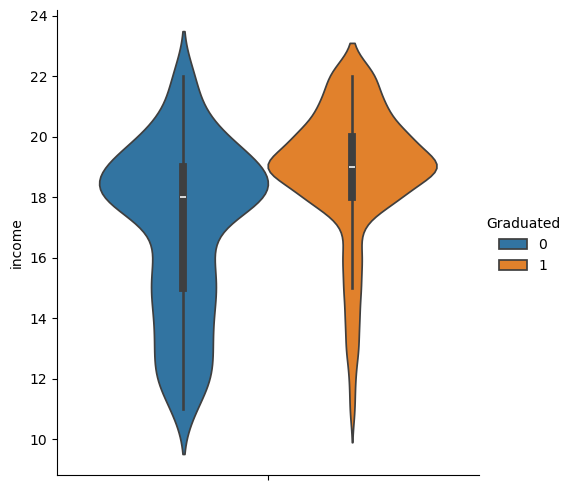

In [87]:
sns.catplot(data = NHEFS, y = 'income', hue = 'Graduated', kind = 'violin')

2. Created a plot to illustrate the distribution of income across the three groups in the school column

**2. Completion Level and Income Characteristics**

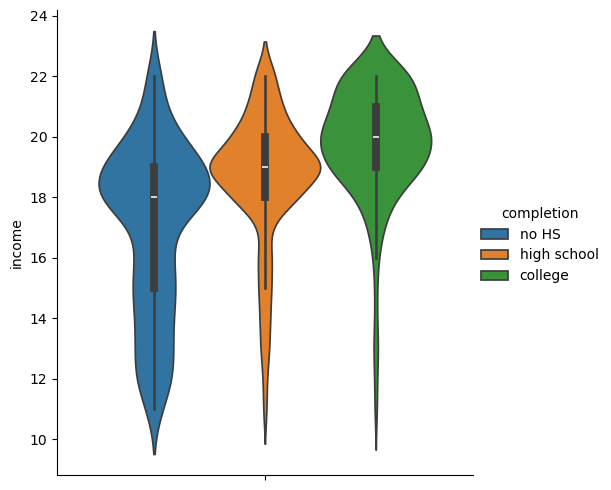

In [88]:
sns.catplot(data = NHEFS, y = 'income', hue = 'completion', kind = 'violin')

3. Created a plot to illustrate the distribution of incomes across different amounts of school years

**3. Years of Schooling and Income Characteristics**

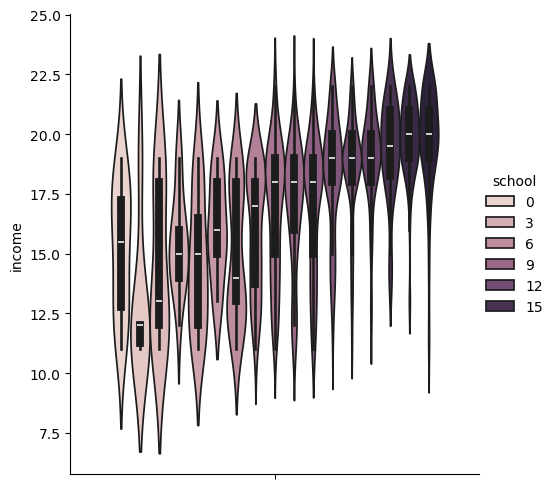

In [89]:
sns.catplot(data = NHEFS, y = 'income', hue = 'school', kind = 'violin')

## Question 2: Blue jays
This data condains 123 blue jays and measurements of their bodies.
Read in the blue jays data.

### A. Summarize
Make a data frame comparing mean of each characteristic for the two blue jay sexes. 

1. Uploading the bluejay dataset

In [90]:
BlueJays = pd.read_table('bluejays.txt')

2. Grouping numerical characteristics by sex

In [91]:
BlueJaySexCharacteristicMeans = BlueJays.groupby('KnownSex')[['BillDepth', 'BillWidth', 'BillLength', 'Head', 'Mass', 'Skull']].mean()
BlueJaySexCharacteristicMeans

,BillDepth,BillWidth,BillLength,Head,Mass,Skull
KnownSex,,,,,,
F,8.012333,9.118000,24.184000,54.645333,69.806333,30.461667
M,8.444603,9.312698,25.462381,56.691905,73.225079,31.230000


### B. Visualize
Make a visualization comparing the sexes for one number characteristic. Interpret the visualization and compare to your data frame results.

1. Plotting the distribution of mass for each sex

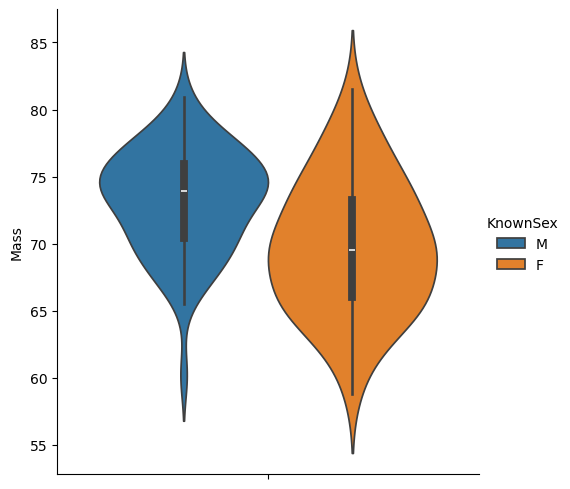

In [92]:
sns.catplot(data = BlueJays, y='Mass', hue = 'KnownSex', kind='violin')

    The plot above illustrates that male bluejays exhibit a greater average mass, which alligns with the results presented in the BlueJaySexCharacteristicMeans data frame. The plot also shows that female bluejays exhbit a larger distribution of mass compared to males, which is not shwon in the BlueJaySexCharacteristicMeans data frame. 

## Question 3: Insect eggs
Look at the file for "egg_dataset.tsv" and Readme file that came with it. This has the shapes of thousands of insect species eggs.

### A. Reproduce figure
Read in the data and roughly reproduce the contents of Fig 1A from this article: https://www.nature.com/articles/s41586-019-1302-4 Use the egg shape data, visualizing the eggs from different "group"

1. Created a cleaned Egg dataset by transferring non null values (AR, Logvol and Logar) from the original egg dataset

In [93]:
EggDataset = pd.read_table("egg_dataset.tsv")

NAValuesAR = pd.isnull(EggDataset['logar'])
NonNAValuesAR = ~NAValuesAR
CleanedEggDataset = EggDataset.loc[NonNAValuesAR,:]

NAValuesVOL = pd.isnull(EggDataset['logvol'])
NonNAValuesVOL = ~NAValuesVOL
CleanedEggDataset = EggDataset.loc[NonNAValuesVOL,:]

2. Created a plot which illustrated the relationship between the aspect ration log, volume log and organism order)

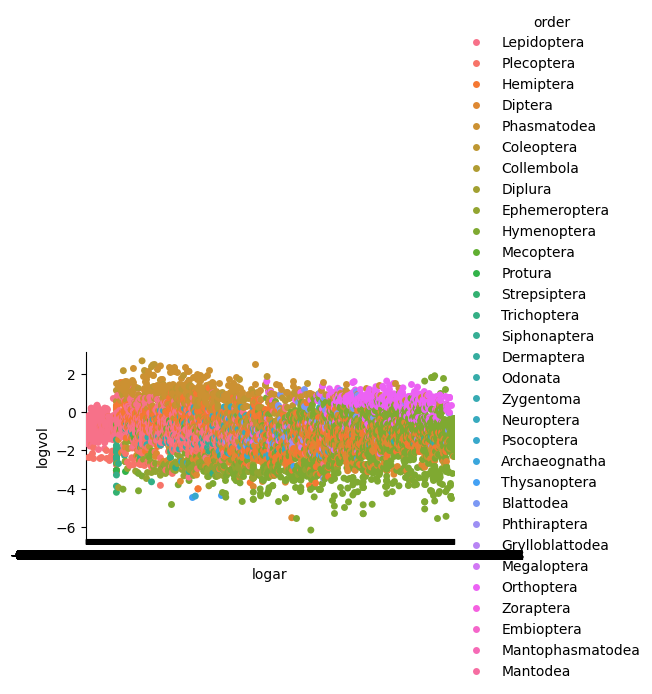

In [94]:
sns.catplot(data = CleanedEggDataset, x = 'logar', y = 'logvol', hue = 'order') 

### B. Compare groups
Make one other plot to compare aspect ratios of Amphiesmenoptera versus the other groups.

1. Created a new column, Group Type, using boolean indexing with .loc to define whether an organism was part of the Amphiesmenoptera. 

In [99]:
CleanedEggDataset.loc[:, 'Group Type'] = ''
CleanedEggDataset.loc[CleanedEggDataset['group'] == 'Amphiesmenoptera', 'Group Type' ] = 'Amphiesmenoptera'
CleanedEggDataset.loc[CleanedEggDataset['group'] != 'Amphiesmenoptera', 'Group Type' ] = 'Other Groups'

2. Used the groupby function to calculate the average aspect ration of Amphiesmenoptera versus the other groups.

In [96]:
CleanedEggDataset.groupby('Group Type')[['logar']].mean()

,logar
Group Type,
Amphiesmenoptera,0.019481
Other Groups,0.411011


Plotting the distribution of aspect ratio for Amphiesmenoptera versus the other groups.

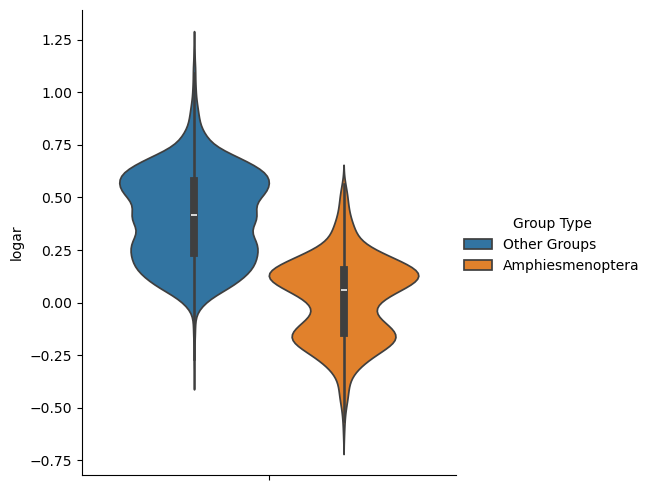

In [97]:
sns.catplot(data = CleanedEggDataset, y = 'logar', hue = 'Group Type', kind = 'violin')